In [11]:
library(ggplot2)

In [12]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv", row.names=1)
head(leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,⋯,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label,new_label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,⋯,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11,FPP_D11
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,⋯,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11,FPP_D11


In [13]:
leads$feature_id = as.character(leads$feature_id)
leads$snp_id = as.character(leads$snp_id)

In [14]:
celltype = "DA"
celltypes = unique(leads$new_label[grep(celltype, leads$new_label)])
all_leads = leads

In [15]:
leads = all_leads[all_leads$global_corr_p_value < 0.05,]
res1 = leads[leads$new_label == celltypes[1],]
res2 = leads[leads$new_label == celltypes[2],]
res3 = leads[leads$new_label == celltypes[3],]

In [16]:
selected_genes = c()
for (i in 1:length(unique(res1$feature_id))){
    gene = res1$feature_id[i]
    snp1 = res1[res1$feature_id == gene,"snp_id"][1]
    snp2 = res2[res2$feature_id == gene,"snp_id"][1]
    snp3 = res3[res3$feature_id == gene,"snp_id"][1]
    if (length(unique(c(snp1,snp2,snp3)))>1){ selected_genes = c(selected_genes,gene) }
}
length(unique(res1$feature_id))
length(unique(selected_genes))

[1] 672

[1] 636

In [17]:
annos_file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
annos = read.csv(annos_file,sep="\t")
head(annos)

feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
ENSG00000000003_TSPAN6,X,99883667,99894988,TSPAN6,ENSG00000000003_TSPAN6,ENSG00000000003
ENSG00000000419_DPM1,20,49551404,49575092,DPM1,ENSG00000000419_DPM1,ENSG00000000419
ENSG00000000457_SCYL3,1,169818772,169863408,SCYL3,ENSG00000000457_SCYL3,ENSG00000000457
ENSG00000000460_C1orf112,1,169631245,169823221,C1orf112,ENSG00000000460_C1orf112,ENSG00000000460
ENSG00000001036_FUCA2,6,143815948,143832827,FUCA2,ENSG00000001036_FUCA2,ENSG00000001036
ENSG00000001084_GCLC,6,53362139,53481768,GCLC,ENSG00000001084_GCLC,ENSG00000001084


In [18]:
selected_genes1 = c()

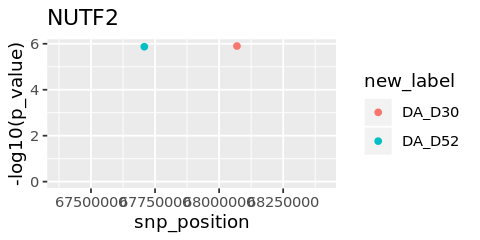

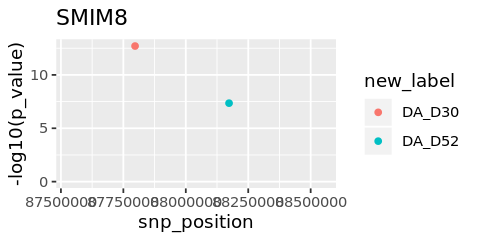

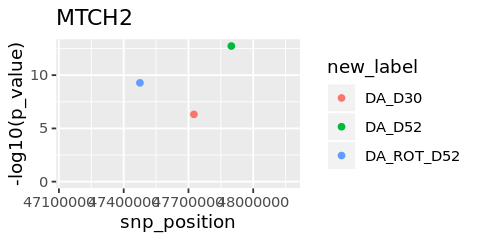

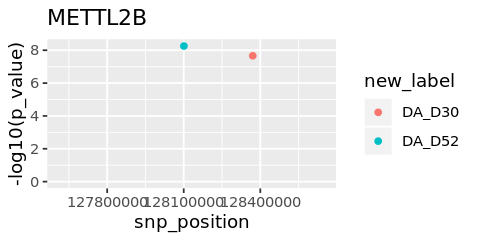

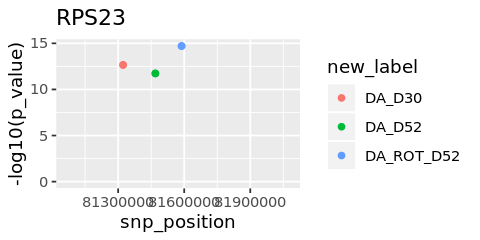

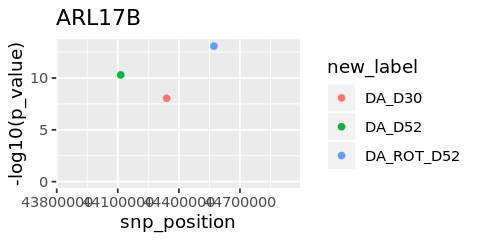

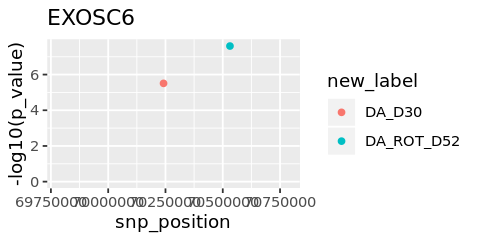

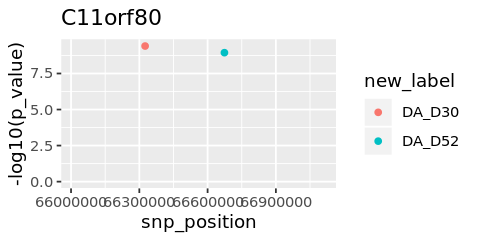

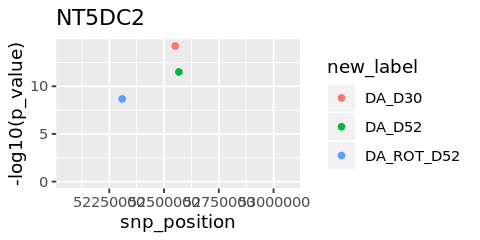

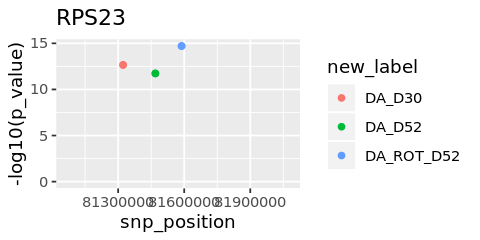

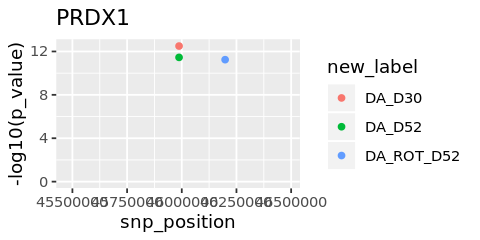

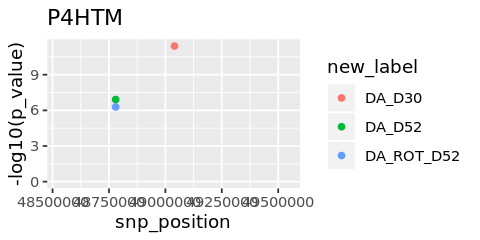

In [19]:
options(repr.plot.width = 4, repr.plot.height = 2)
for (gene in selected_genes){
    gene_name = as.character(annos[annos$ensembl_gene_id == gene,"hgnc_symbol"])
    r1 = res1[res1$feature_id == gene,]
    r2 = res2[res2$feature_id == gene,]
    r3 = res3[res3$feature_id == gene,]
    df = rbind(r1,r2,r3)
    w0 = df$feature_start[1]-500000
    w1 = df$feature_end[1]+500000
#     print(abs(max(df$snp_position)-min(df$snp_position)))
#     print((w1-w0)/10)
    if (abs(max(df$snp_position)-min(df$snp_position))>((w1-w0)/5)){
        selected_genes1 = c(selected_genes1,gene)
        p = ggplot(df, aes(x = snp_position, y = -log10(p_value), colour = new_label))+geom_point()
        p = p + ggtitle(gene_name) + xlim(c(w0,w1)) + ylim(c(0,-log10(min(df$p_value))))
        print(p)
    }  
}

In [20]:
length(selected_genes1)
selected_genes1

[1] 12

[1] "ENSG00000102898" "ENSG00000111850" "ENSG00000109919" "ENSG00000165055"
 [5] "ENSG00000186468" "ENSG00000228696" "ENSG00000223496" "ENSG00000173715"
 [9] "ENSG00000168268" "ENSG00000186468" "ENSG00000117450" "ENSG00000178467"

In [ ]:
# mydir.D30 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_DA/summary_stats/"
# res.DA.D30 = read.csv(paste0(mydir.D30,"pool1_13_noddd_D30.DA.qtl_results_all.txt"),sep="\t")

In [34]:
# mydir.D30 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_DA/summary_stats/"
# in mydir.D30: cat pool1_13_noddd_D30.DA.qtl_results_all.txt | grep ENSG00000178467 | cat > /hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/manhattan_example_P4HTM_D30.txt
res.DA.D30 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_P4HTM_D30.txt",sep="\t", header = F)
res.DA.D30 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_NUTF2_D30.txt",sep="\t", header = F)
res.DA.D30 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_SMIM8_D30.txt",sep="\t", header = F)
# res.DA.D30 = res.DA.D30[,c(1:5,8:9,12:14)]
# colnames(res.DA.D30) = c("feature_id","snp_id","p_value","beta","beta_se",
#                          "feature_start","feature_end","chrom","snp_position","assessed_allele")
head(res.DA.D30)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>
ENSG00000111850,6_87796886_T_C,1.977254e-13,0.3615387,0.04918676,-1,6,88032301,88052043,165,165,6,87796886,C,1,0.4545455,0.271007
ENSG00000111850,6_87797280_C_G,1.977254e-13,0.3615387,0.04918676,-1,6,88032301,88052043,165,165,6,87797280,G,1,0.4545455,0.271007
ENSG00000111850,6_87798512_A_G,1.977254e-13,0.3615387,0.04918676,-1,6,88032301,88052043,165,165,6,87798512,G,1,0.4545455,0.271007
ENSG00000111850,6_87799514_C_A,1.977254e-13,0.3615387,0.04918676,-1,6,88032301,88052043,165,165,6,87799514,A,1,0.4545455,0.271007
ENSG00000111850,6_87799885_T_A,1.977254e-13,0.3615387,0.04918676,-1,6,88032301,88052043,165,165,6,87799885,A,1,0.4545455,0.271007
ENSG00000111850,6_87801536_T_C,1.977254e-13,0.3615387,0.04918676,-1,6,88032301,88052043,165,165,6,87801536,C,1,0.4545455,0.271007


In [55]:
DA.D30.dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/"
myfiles = paste0(DA.D30.dir,list.files(DA.D30.dir))
myfiles

[1] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_ARL17B_D30.txt"  
 [2] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_C11orf80_D30.txt"
 [3] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_EXOSC6_D30.txt"  
 [4] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_METTL2B_D30.txt" 
 [5] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_MTCH2_D30.txt"   
 [6] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_NT5DC2_D30.txt"  
 [7] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_NUTF2_D30.txt"   
 [8] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_P4HTM_D30.txt"   
 [9] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_PRDX1_D30.txt"   
[10] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_RPS23_D30.txt"   
[11] "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/eqtl_example/DA/manhattan_example_SMIM8_D30.txt"

In [56]:
res.DA.D30 <- do.call(`rbind`,lapply(myfiles, read.csv, sep="\t", header = F))

In [57]:
head(res.DA.D30)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>
ENSG00000228696,17_44340168_G_A,9.150502e-09,0.6200250,0.1079099,-1,17,44352150,44439130,165,165,17,44340168,A,1,0.1575758,0.03404223
ENSG00000228696,17_44819595_T_G,1.101020e-08,0.5734070,0.1003445,-1,17,44352150,44439130,165,165,17,44819595,G,1,0.1878788,0.03974609
ENSG00000228696,17_44264420_G_C,1.142546e-08,0.6483705,0.1135881,-1,17,44352150,44439130,165,165,17,44264420,C,1,0.1484848,0.20925357
ENSG00000228696,17_44326895_T_C,1.317462e-08,0.6304079,0.1109134,-1,17,44352150,44439130,165,165,17,44326895,C,1,0.1545455,0.07379082
ENSG00000228696,17_44172679_G_A,1.453995e-08,0.6272337,0.1106836,-1,17,44352150,44439130,165,165,17,44172679,A,1,0.1515152,0.06401449
ENSG00000228696,17_44310965_T_A,1.481621e-08,0.6507424,0.1148975,-1,17,44352150,44439130,165,165,17,44310965,A,1,0.1454545,0.11792267


In [25]:
mydir.D52 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/summary_stats/for_coloc/"
res.DA.D52 = read.csv(paste0(mydir.D52,"qtl_results_NONE_DA_all.txt"),sep="\t")
res.DA.D52ROT = read.csv(paste0(mydir.D52,"qtl_results_ROT_DA_all.txt"),sep="\t")

In [26]:
ncol(res.DA.D52ROT)

[1] 17

In [58]:
colnames(res.DA.D30) = colnames(res.DA.D52ROT)

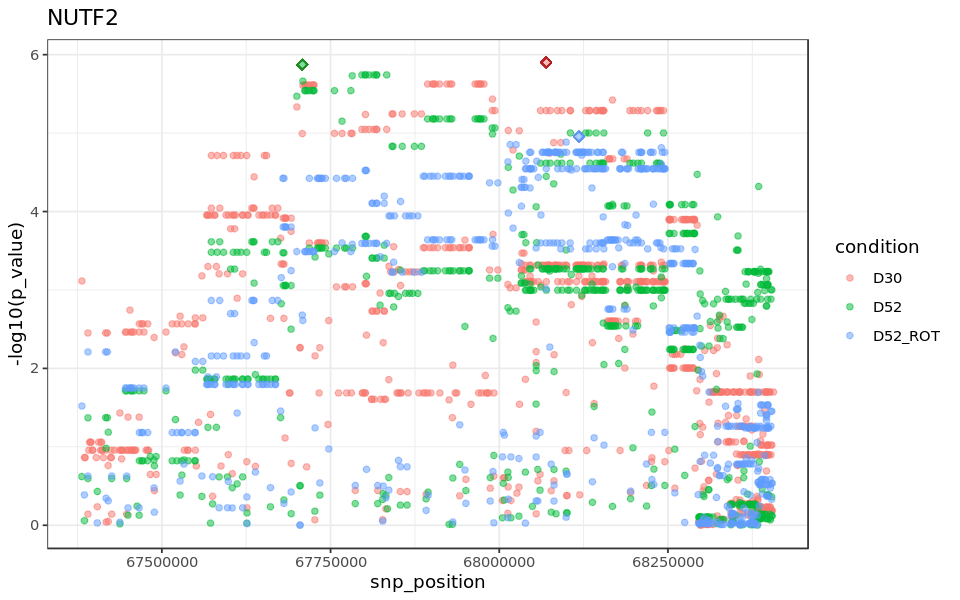

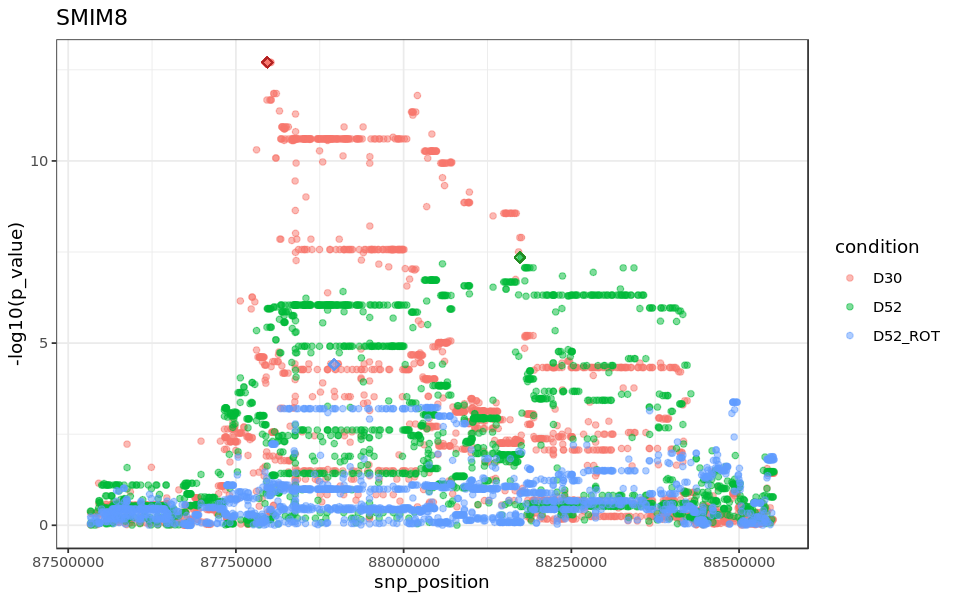

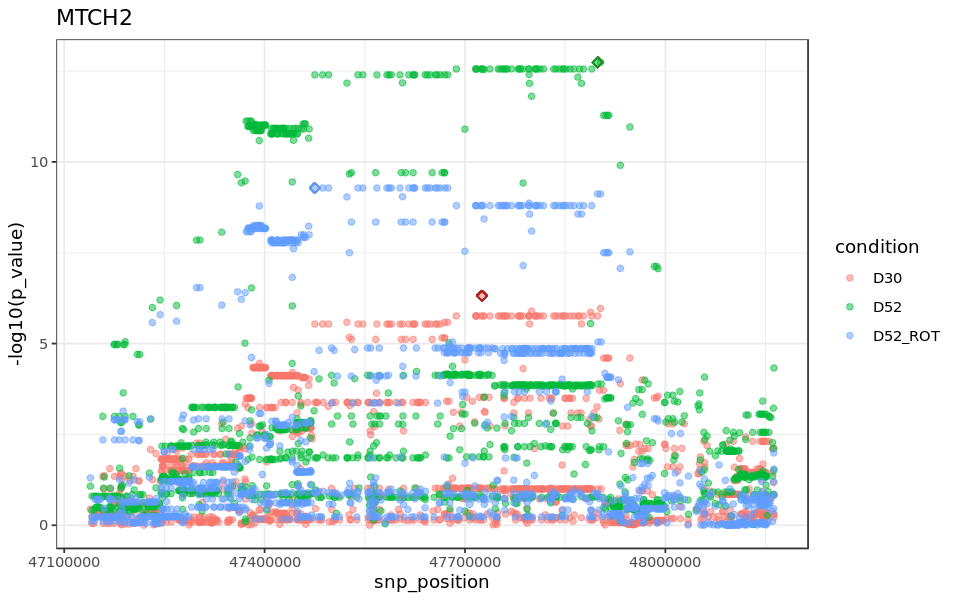

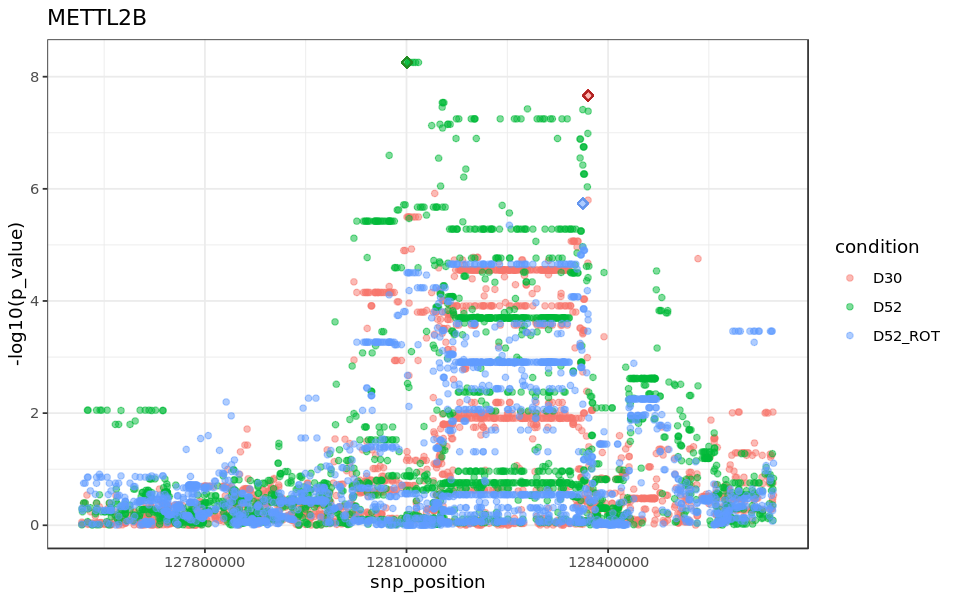

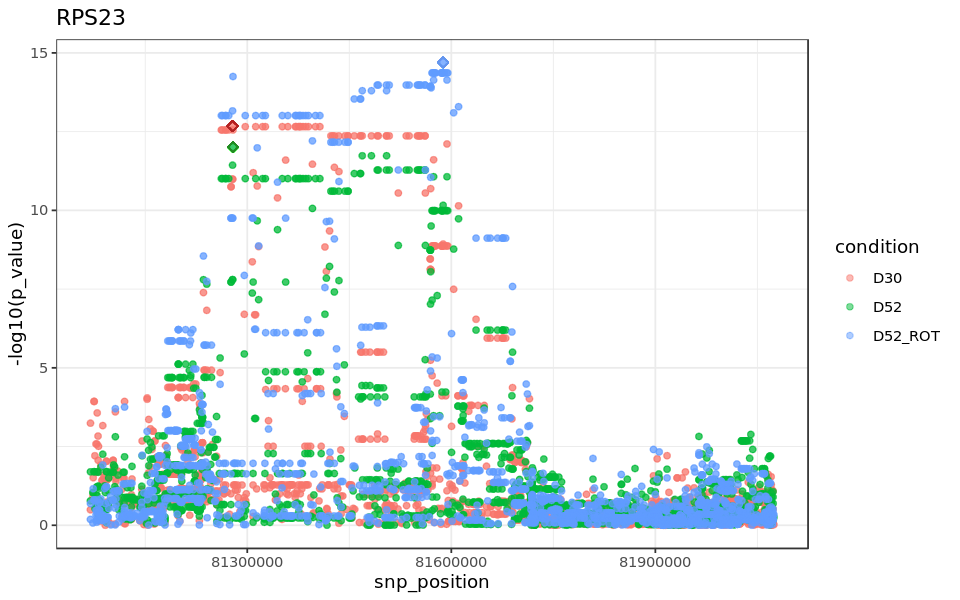

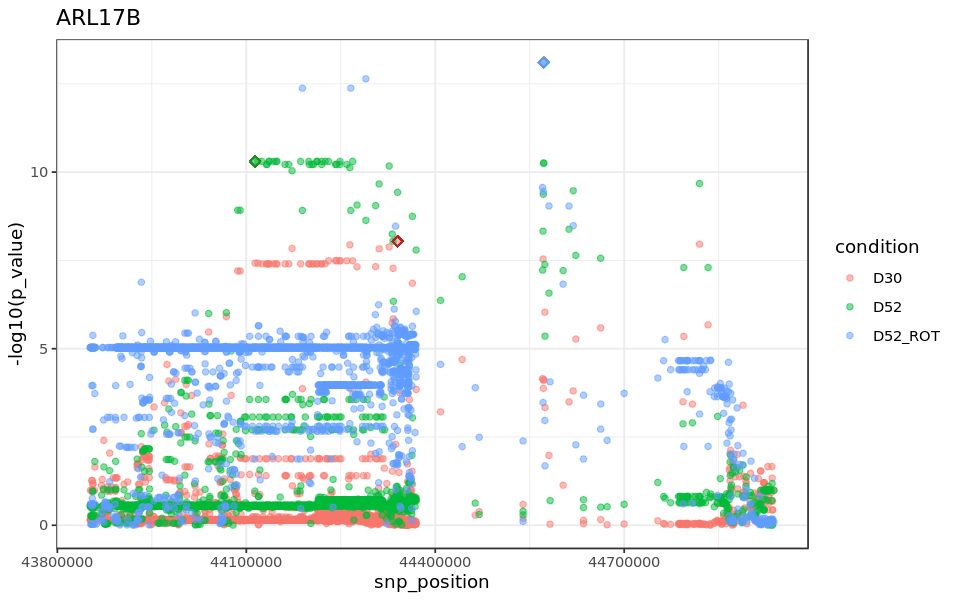

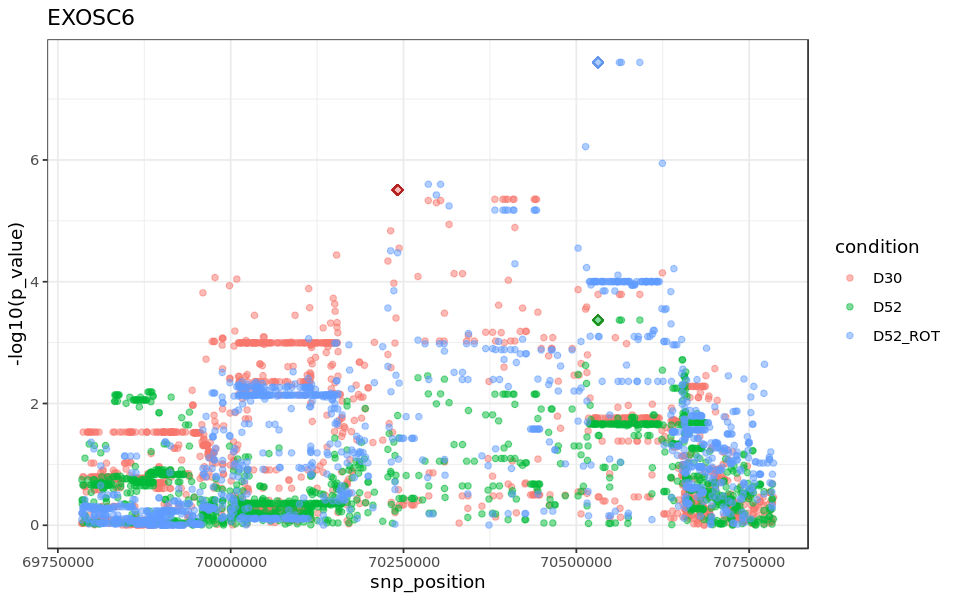

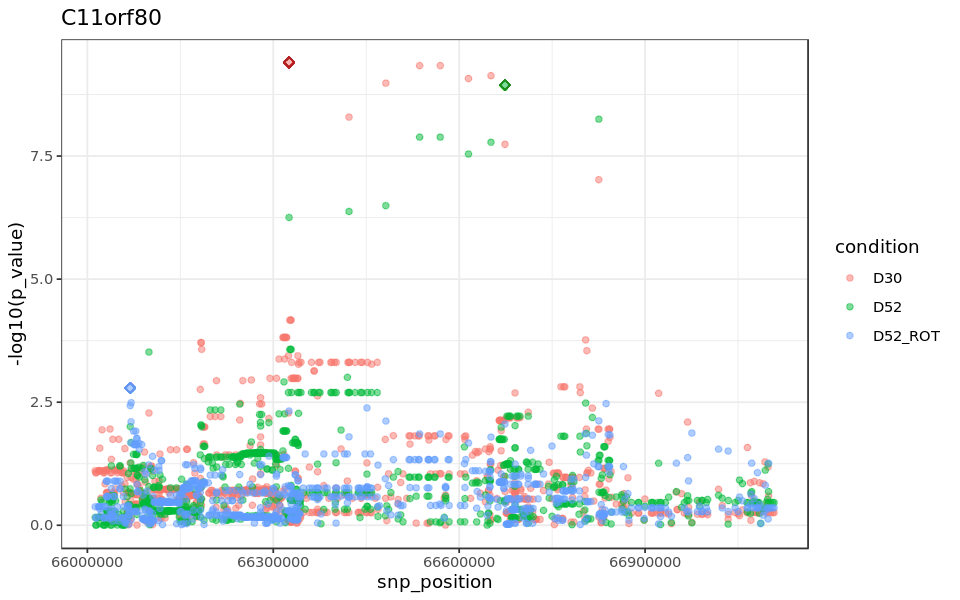

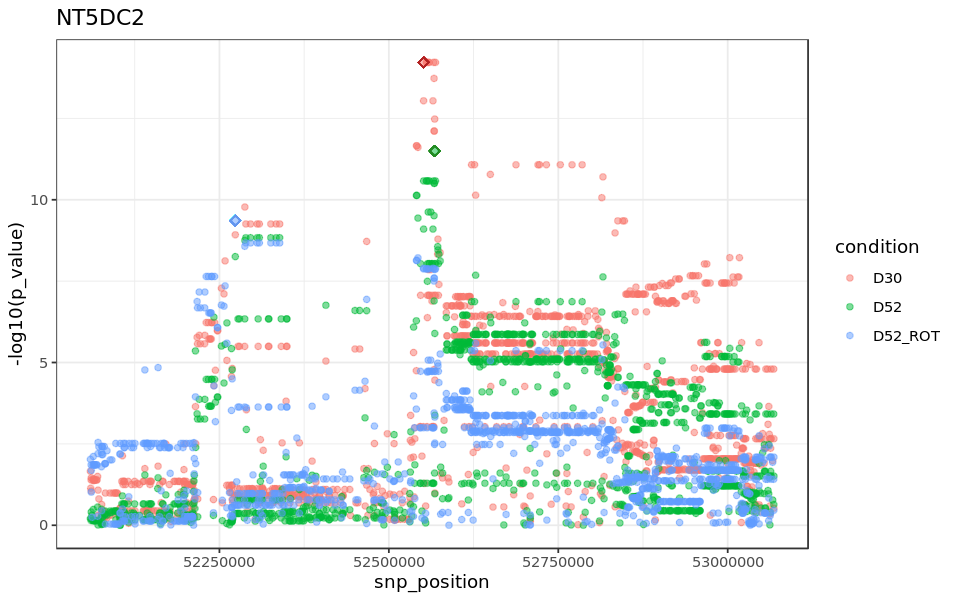

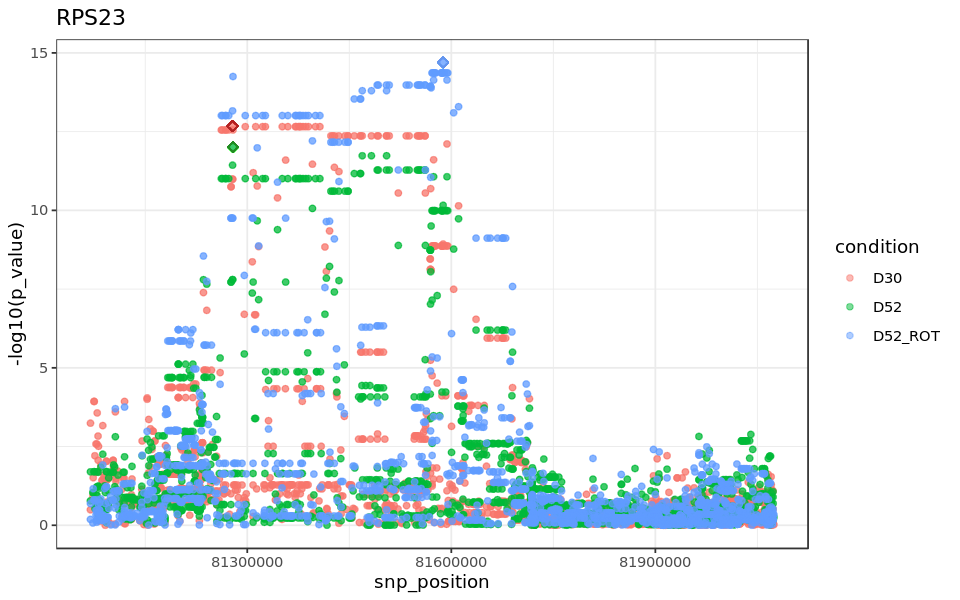

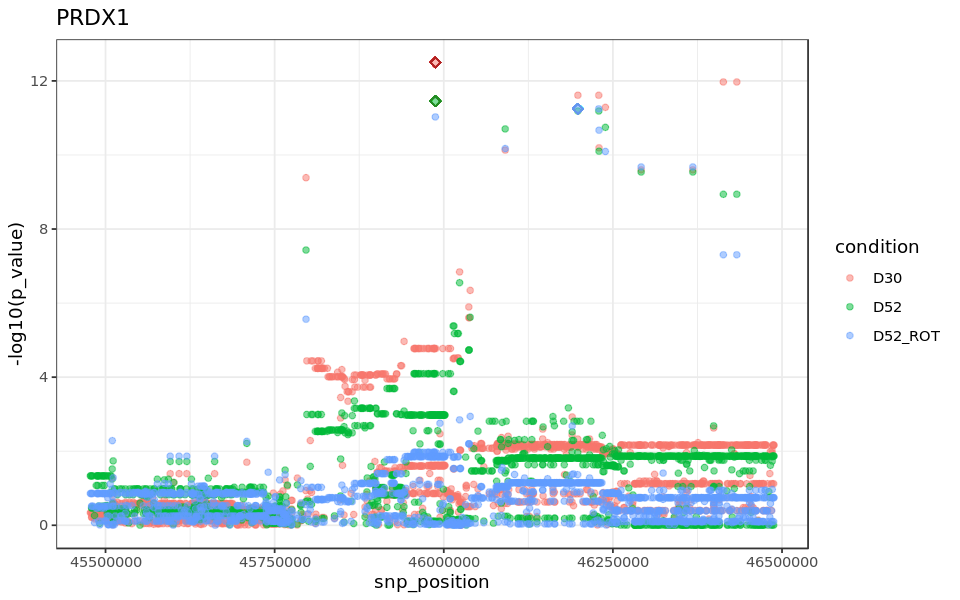

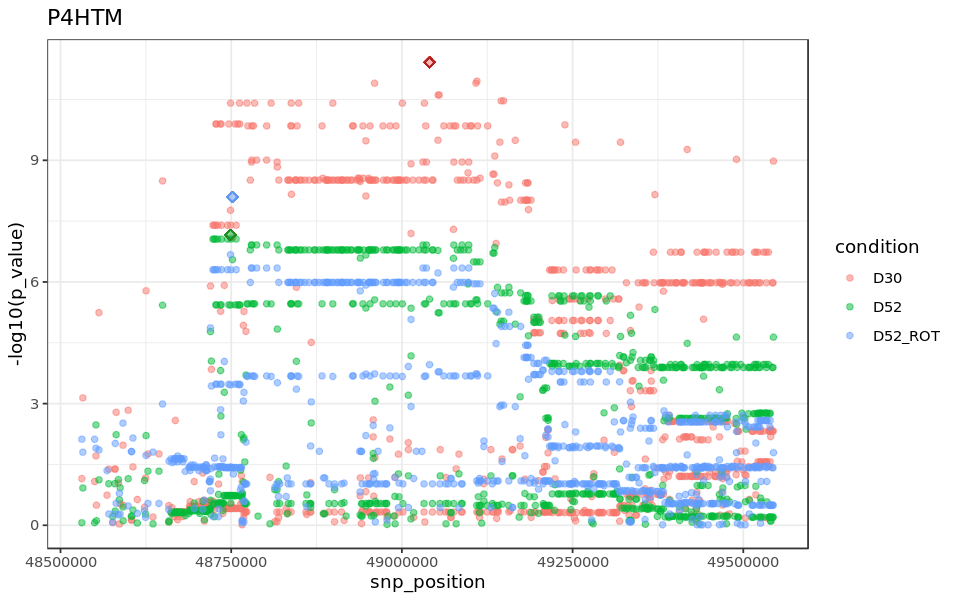

In [59]:
options(repr.plot.width = 8, repr.plot.height = 5)
for (gene in selected_genes1){
    gene_name = as.character(annos[annos$ensembl_gene_id == gene,"hgnc_symbol"])
    r1 = res.DA.D30[res.DA.D30$feature_id == gene,]
    r2 = res.DA.D52[res.DA.D52$feature_id == gene,]
    r3 = res.DA.D52ROT[res.DA.D52ROT$feature_id == gene,]
#     print(head(r1))
    r1$condition = "D30"
    r2$condition = "D52"
    r3$condition = "D52_ROT"
    df = rbind(r1,r2,r3)
    m1 = min(df[df$condition == "D30","p_value"])
    pos1 = df[df$condition == "D30" & df$p_value == m1,"snp_position"][1]
    m2 = min(df[df$condition == "D52","p_value"])
    pos2 = df[df$condition == "D52" & df$p_value == m2,"snp_position"][1]
    m3 = min(df[df$condition == "D52_ROT","p_value"])
    pos3 = df[df$condition == "D52_ROT" & df$p_value == m3,"snp_position"][1]
    p = ggplot(df, aes(x = snp_position, y = -log10(p_value), colour = condition))+geom_point(alpha = 0.5)
    p = p + geom_point(aes(x=pos1, y = -log10(m1)),col="firebrick", size = 2, shape = 23, alpha = 1)
    p = p + geom_point(aes(x=pos2, y = -log10(m2)),col="forestgreen", size = 2, shape = 23, alpha = 1)
    p = p + geom_point(aes(x=pos3, y = -log10(m3)),col="cornflowerblue", size = 2, shape = 23, alpha = 1)
    p = p + ggtitle(gene_name) #+ xlim(c(w0,w1)) 
    p = p + ylim(c(0,-log10(min(df$p_value)))) + theme_bw()
    print(p)  
}